In [3]:
import os
from glob import glob
import matplotlib.pyplot as plt
import cv2
from scipy.misc import imsave
import numpy as np
from skimage.measure import label, regionprops
import json,shutil
from PIL import Image

1.Patient Name: CAIWENDA_100799384


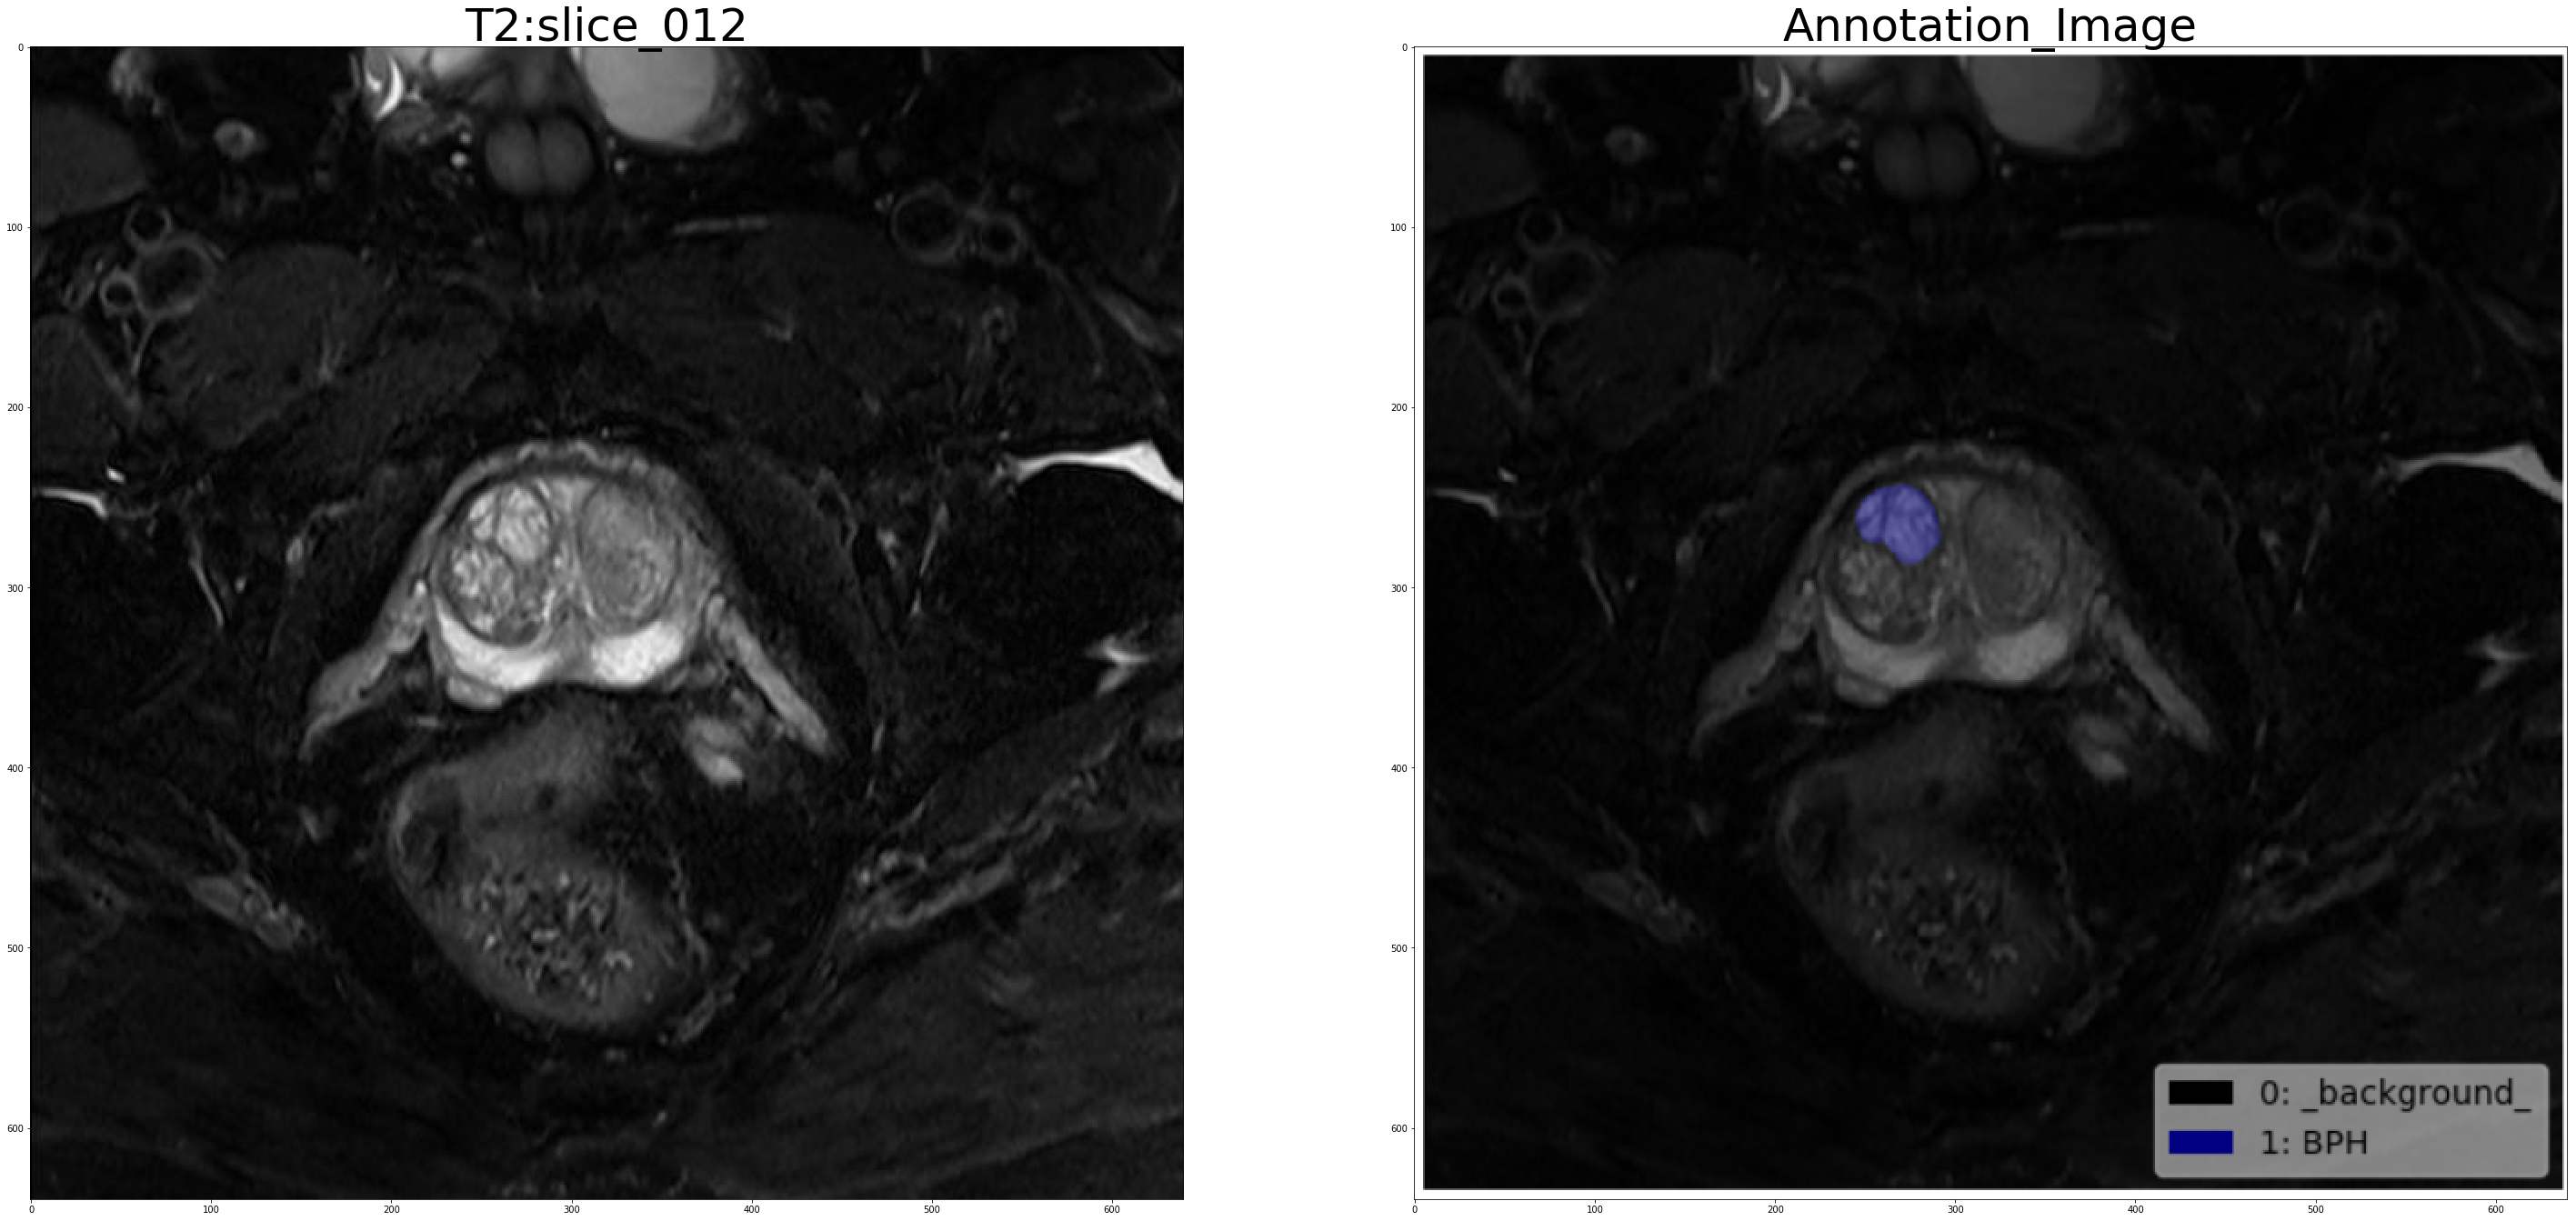

********************************************************************************************************************************************


In [54]:
# DIRCTORY  CATEGORY:
#     --Validate_Annotation.py
#     --anno (Dirctory)
#     --20181218_10_biaozhun  (Dirctory)
#       --Patient_1
#         --Image
#         --Mask
#     --Processed_Data (Directory)
#       --ADC
#         --Classification
#           --1
#           --2
#           --...10
#           --BPH
#         --Segmentation
#           --PCA_Seg
#           --Prostate_Seg
#       --DWI
#       --DCE
#       --T2


# two annotation subsets, one for segmentation task, the other one for classification task;

seg_anno_files=glob('../20181218_10_biaozhun/*')
classification_anno_files=glob('../C20181218_10_biaozhun/*')
visualization_files=glob('../Visualization/*')


# print (anno_files)
# patient_name=os.listdir('../20181218_10_biaozhun/')
# patient_name

series='T2'

# Draw_mask
def draw_mask(image):
    mask = np.zeros([image.shape[0], image.shape[1]])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            at_pixel = image[i, j].all()
            if at_pixel > 0:
                mask[i,j] = 1
    return mask



# Visualize the annotation of the image 
def visualize_annotation(series,anno_files):

    for i,anno_file in enumerate(anno_files[:1]):
    #     print (anno_file+'/Mask/'+series+'/*')

        json_files=glob(anno_file+'/Mask/'+series+'/*/*')

        if len(json_files)>0:
            patient_name=json_files[0].split('/')[1].split('\\')[-1]
            print ('%d.Patient Name: %s'%(i+1,patient_name))

            for json_file in json_files:
                slice=json_file.split('/')[-1].split('\\')[-1][:-5]
                f,ax=plt.subplots(1,2,figsize=(50,100))
                os.system('labelme_json_to_dataset '+json_file+' -o anno')
                
                original_img=cv2.imread('./anno/img.png')
                anno_img=cv2.imread('./anno/label_viz.png')
                ax[0].imshow(original_img)
                ax[0].set_title(series+':'+slice, fontsize=50)
                ax[1].imshow(anno_img)
                ax[1].set_title('Annotation_Image', fontsize=50)

                plt.show()
        else:
            patient_no_name=anno_file.split('\\')[-1]
            print ('%d.Patient 【%s】 no annotation...'%(i+1,patient_no_name))
        print ('********************************************************************************************************************************************')

        
# Mask over image 
def mask_over_img():
    print ('Mask over image')

    
    
# Separate the multi_json files to single one json, remember to backup the original files if implement this function
def SeparatorMultiMask(json_path):
    (file_path,file_name) = os.path.split(json_path)
    with open(json_path,'r') as f:
        load_dict = json.load(f)
        #print(load_dict)
        if len(load_dict['shapes'])>1:
            for i in range(len(load_dict['shapes'])):
                print(i)
                new_shape = copy.deepcopy(load_dict)
                del new_shape['shapes'][i]
                new_file_name = file_path+'/'+file_name.split('.')[0]+'_'+str(i)+'.json'
                with open(new_file_name,"w") as fw:
                    json.dump(new_shape,fw)
                    print("Separate "+json_path+" to "+new_file_name)
            #***Remember to backup the annotation files if you want to remove original multi-label file****
            os.system("rm "+json_path)
            print("Warning: The original file will be removed!")        
 



# Draw mask bounding-box

def draw_mask_bouding_box(mask_img,image):
    props = regionprops(mask_img.astype(int))
    img_1 = image.copy()
    
#     for prop in props:
#         print('Found bbox', prop.bbox)
#         cv2.rectangle(img_1, (prop.bbox[1]-3, prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 1)
    prop=props[0]
#     print ('Found bbox', prop.bbox)
#     cv2.rectangle(img_1, (prop.bbox[1]-3, prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 1)
#     plt.imshow(img_1,cmap=plt.cm.gray)
#     plt.show()
    return prop.bbox
 


# Separate the multi-json files
def SeparatorMultiMask(json_path):
    (file_path,file_name) = os.path.split(json_path)
    with open(json_path,'r') as f:
        load_dict = json.load(f)
        #print(load_dict)
        if len(load_dict['shapes'])>1:
            for i in range(len(load_dict['shapes'])):
                print(i)
                new_shape = copy.deepcopy(load_dict)
                del new_shape['shapes'][i]
                new_file_name = file_path+'/'+file_name.split('.')[0]+'_'+str(i)+'.json'
                with open(new_file_name,"w") as fw:
                    json.dump(new_shape,fw)
                    print("Separate "+json_path+" to "+new_file_name)
            #***Remember to backup the annotation files if you want to remove original multi-label file****
            os.system("rm "+json_path)
            print("Warning: The original file will be removed!")


    
# Generate the segmentation training data 
def generate_PCA_Seg_data(series,anno_files):

    for i,anno_file in enumerate(anno_files[:1]):
    #     print (anno_file+'/Mask/'+series+'/*')

        json_files=glob(anno_file+'/Mask/'+series+'/*/*')

        if len(json_files)>0:
            patient_name=json_files[0].split('/')[1].split('\\')[-1]
#             print ('%d.Patient Name: %s'%(i+1,patient_name))

            for json_file in json_files:
                slice=json_file.split('/')[-1].split('\\')[-1][:-5]
                f,ax=plt.subplots(1,3,figsize=(50,100))
                os.system('labelme_json_to_dataset '+json_file+' -o anno')
                original_img=cv2.imread('./anno/img.png',0)
                mask_img=draw_mask(cv2.imread('./anno/label.png',0))
                anno_img=cv2.imread('./anno/label_viz.png')
                ax[0].imshow(original_img,cmap=plt.cm.gray)
                ax[0].set_title(series+':'+slice, fontsize=50)
                ax[1].imshow(anno_img,cmap=plt.cm.gray)
                ax[1].set_title('Annotation_Image', fontsize=50)
                ax[2].imshow(mask_img,cmap=plt.cm.gray)
                ax[2].set_title('Mask_Image', fontsize=50)
                cv2.imwrite('../Processed_Data/'+series+'/Segmentation/PCA_Seg/Image/'+patient_name+'_'+slice+'.png',original_img)
                imsave('../Processed_Data/'+series+'/Segmentation/PCA_Seg/Mask/'+patient_name+'_'+slice+'.png',mask_img)
#                 cv2.imwrite('../Processed_Data/'+series+'/Segmentation/PCA_Seg/Mask/'+patient_name+'_'+slice+'.png',mask_img)
                plt.show()
#                 draw_mask_bouding_box(mask_img,original_img)

        else:
            patient_no_name=anno_file.split('\\')[-1]
            print ('%d.Patient 【%s】 no annotation...'%(i+1,patient_no_name))
        print ('********************************************************************************************************************************************')


        
# Generate the classification training data 
def generate_PCA_Classification_data(series,anno_files):

    for i,anno_file in enumerate(anno_files[:1]):
    #     print (anno_file+'/Mask/'+series+'/*')

        json_files=glob(anno_file+'/Mask/'+series+'/*/*')
        # Separate the multi-json files
        if len(json_files)>0:
            for json_file in json_files:
                SeparatorMultiMask(json_file)
                
        if len(json_files)>0:
            patient_name=json_files[0].split('/')[1].split('\\')[-1]
#             print ('%d.Patient Name: %s'%(i+1,patient_name))

            for t,json_file in enumerate(json_files):
                slice=json_file.split('/')[-1].split('\\')[-1][:-5]

                f,ax=plt.subplots(2,3,figsize=(50,100))
                os.system('labelme_json_to_dataset '+json_file+' -o anno')
                original_img=cv2.imread('./anno/img.png',0)
                mask_img=draw_mask(cv2.imread('./anno/label.png',0))
                anno_img=cv2.imread('./anno/label_viz.png')
                mask_over_img=original_img.copy()
                mask_over_img[(mask_img==0)]=1
                


                bbox=draw_mask_bouding_box(mask_img,original_img)
                print (bbox)
#                 bbox=(bbox[1],bbox[0],bbox[3],bbox[2])
                crop_img=Image.fromarray(mask_over_img)
#                 crop_img=mask_img[bbox[1]-20:bbox[3]+20,bbox[0]-20:bbox[2]+20]
                crop_img=crop_img.crop((bbox[1]-1,bbox[0]-1,bbox[3]+1,bbox[2]+1))
#                 crop_img=crop_img.resize((32,32))

                bbox_img=original_img.copy()
                cv2.rectangle(bbox_img, (bbox[1]-3, bbox[0]), (bbox[3], bbox[2]), (255, 0, 0), 1)
                f.subplots_adjust(hspace=0.2)

        #                 crop_img=mask_over_img[]
                ax[0,0].imshow(original_img,cmap=plt.cm.gray)
                ax[0,0].set_title(series+':'+slice, fontsize=50)
                ax[0,1].imshow(anno_img,cmap=plt.cm.gray)
                ax[0,1].set_title('Annotation_Image', fontsize=50)
                ax[0,2].imshow(mask_img,cmap=plt.cm.gray)
                ax[0,2].set_title('Mask_Image', fontsize=50)
                ax[1,0].imshow(mask_over_img,cmap=plt.cm.gray)
                ax[1,0].set_title('Mask_Over_Image', fontsize=50)
                ax[1,1].imshow(bbox_img,cmap=plt.cm.gray)
                ax[1,1].set_title('Boundingbox_Image', fontsize=50)
                ax[1,2].imshow(crop_img,cmap=plt.cm.gray)
                ax[1,2].set_title('ROI_Image', fontsize=50)
                
#                 cv2.imwrite('../Processed_Data/'+series+'/Segmentation/PCA_Seg/Image/'+patient_name+'_'+slice+'.png',original_img)
#                 imsave('../Processed_Data/'+series+'/Segmentation/PCA_Seg/Mask/'+patient_name+'_'+slice+'.png',mask_img)
#                 cv2.imwrite('../Processed_Data/'+series+'/Segmentation/PCA_Seg/Mask/'+patient_name+'_'+slice+'.png',mask_img)

                plt.show()
    
    
                with open(json_file,'r') as f:
                    load_dict = json.load(f)
                    print(load_dict['shapes'][0]['label'][-1])
                    label=load_dict['shapes'][0]['label'][-1]
                    if label<>'H':
                        imsave('../Processed_Data/'+series+'/Classification/'+label+'/'+patient_name+'_'+slice+'_'+(str)(t)+'.png',crop_img)
#                         shutil.copyfile('./anno/img.png','../Processed_Data/'+series+'/Classification/'+label+'/'+patient_name+'_'+slice+'.png')
                    else:
                        imsave('../Processed_Data/'+series+'/Classification/BPH/'+patient_name+'_'+slice+'_'+(str)(t)+'.png',crop_img)
#                         shutil.copyfile('./anno/img.png','../Processed_Data/'+series+'/Classification/BPH/'+patient_name+'_'+slice+'.png')


        else:
            patient_no_name=anno_file.split('\\')[-1]
            print ('%d.Patient 【%s】 no annotation...'%(i+1,patient_no_name))
        print ('********************************************************************************************************************************************')

        
visualize_annotation(series,visualization_files)  


# generate_PCA_Seg_data(series,seg_anno_files)

# generate_PCA_Classification_data(series,classification_anno_files)


1.Patient Name: CAIWENDA_100799384


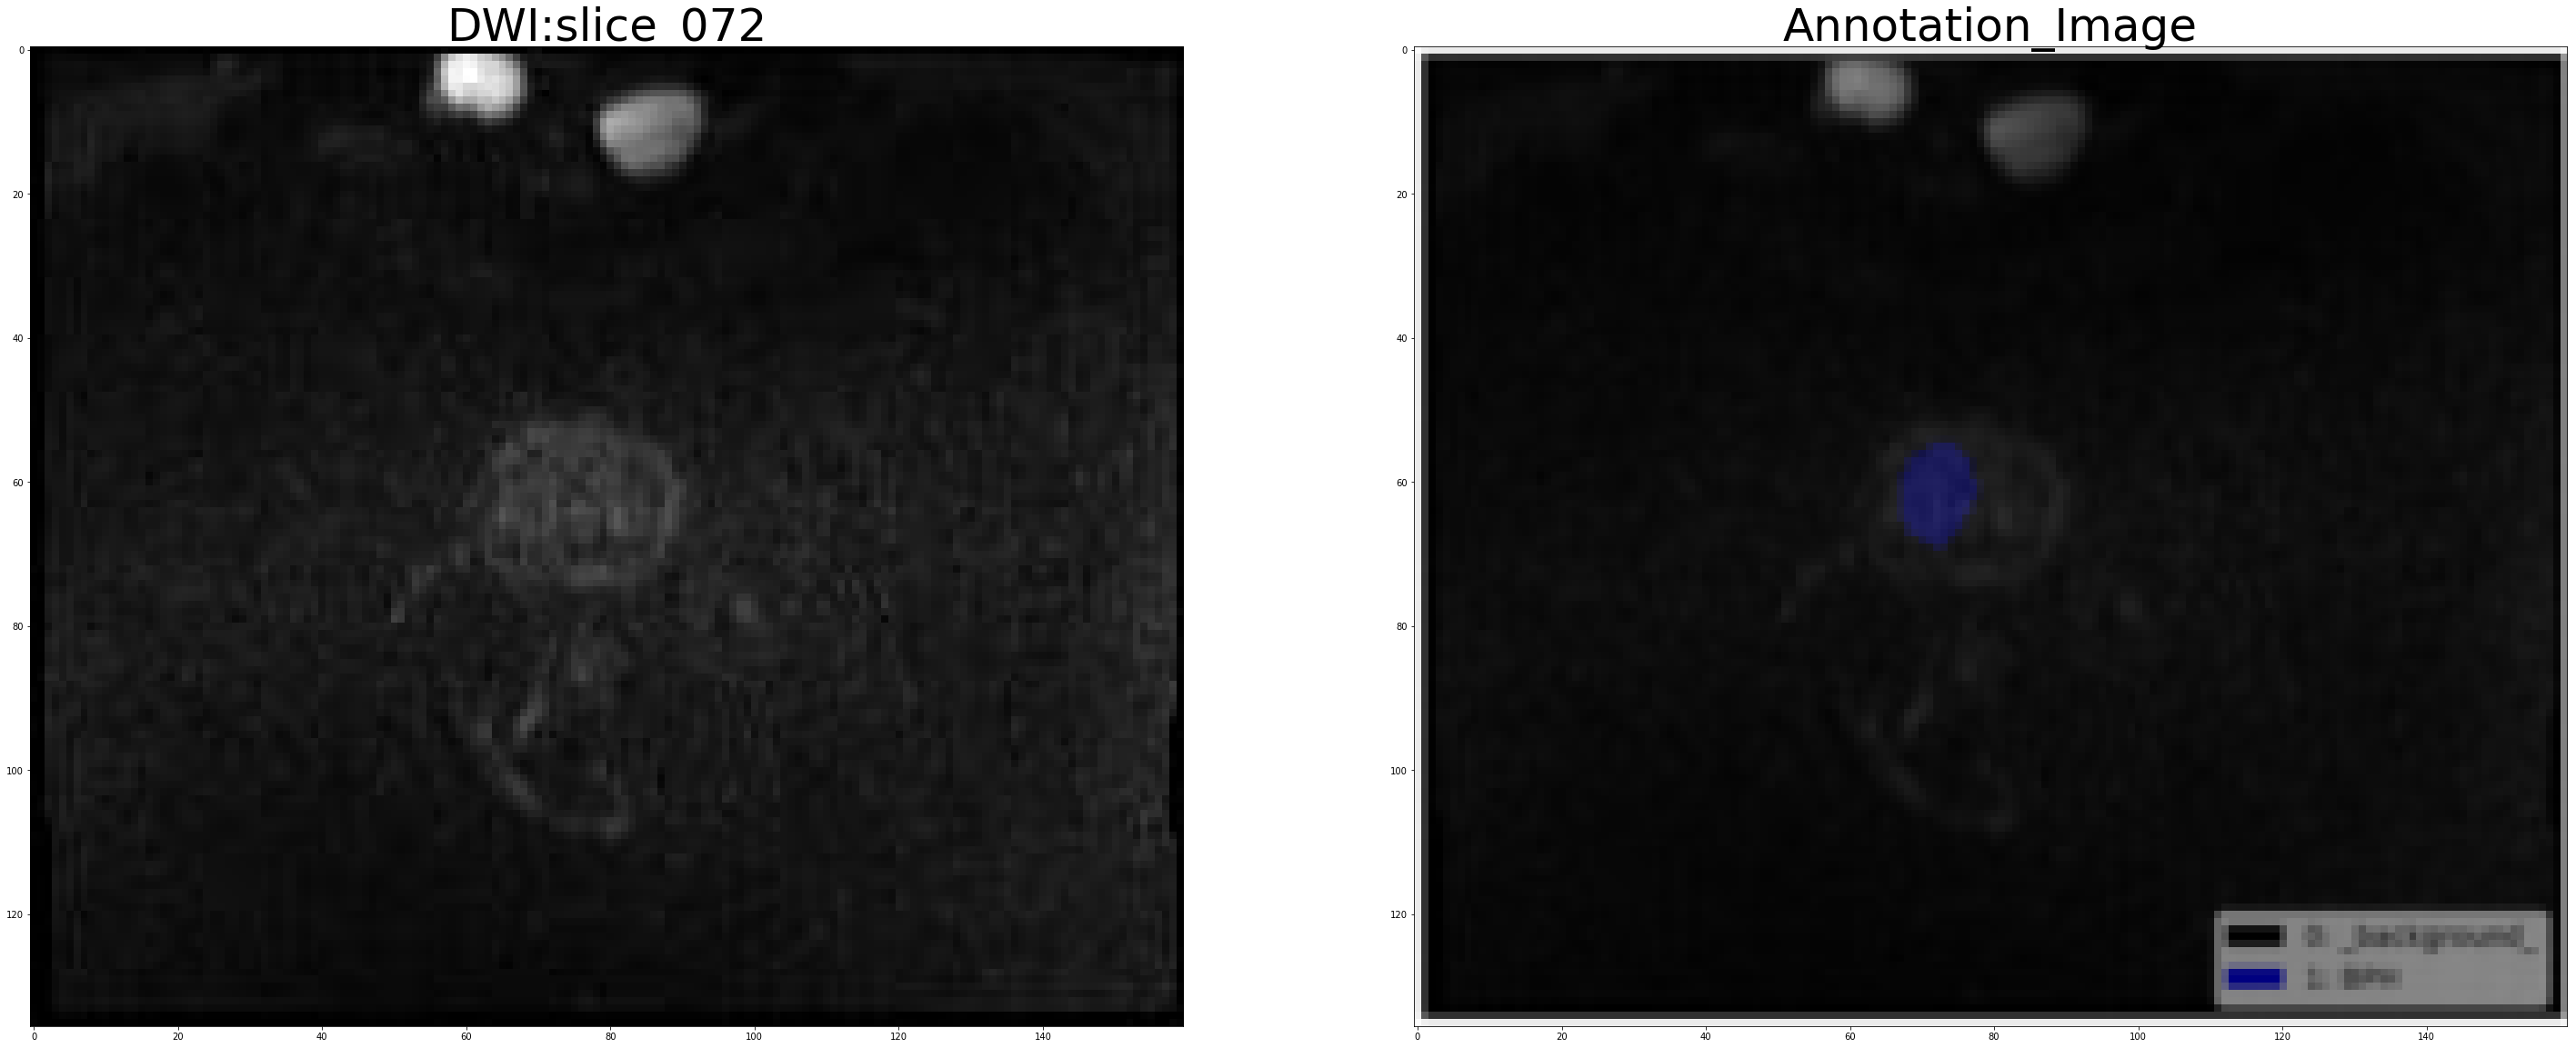

********************************************************************************************************************************************


In [55]:
series='DWI'

visualize_annotation(series,visualization_files)

# generate_PCA_Seg_data(series,seg_anno_files)

# generate_PCA_Classification_data(series,classification_anno_files)

1.Patient Name: CAIWENDA_100799384


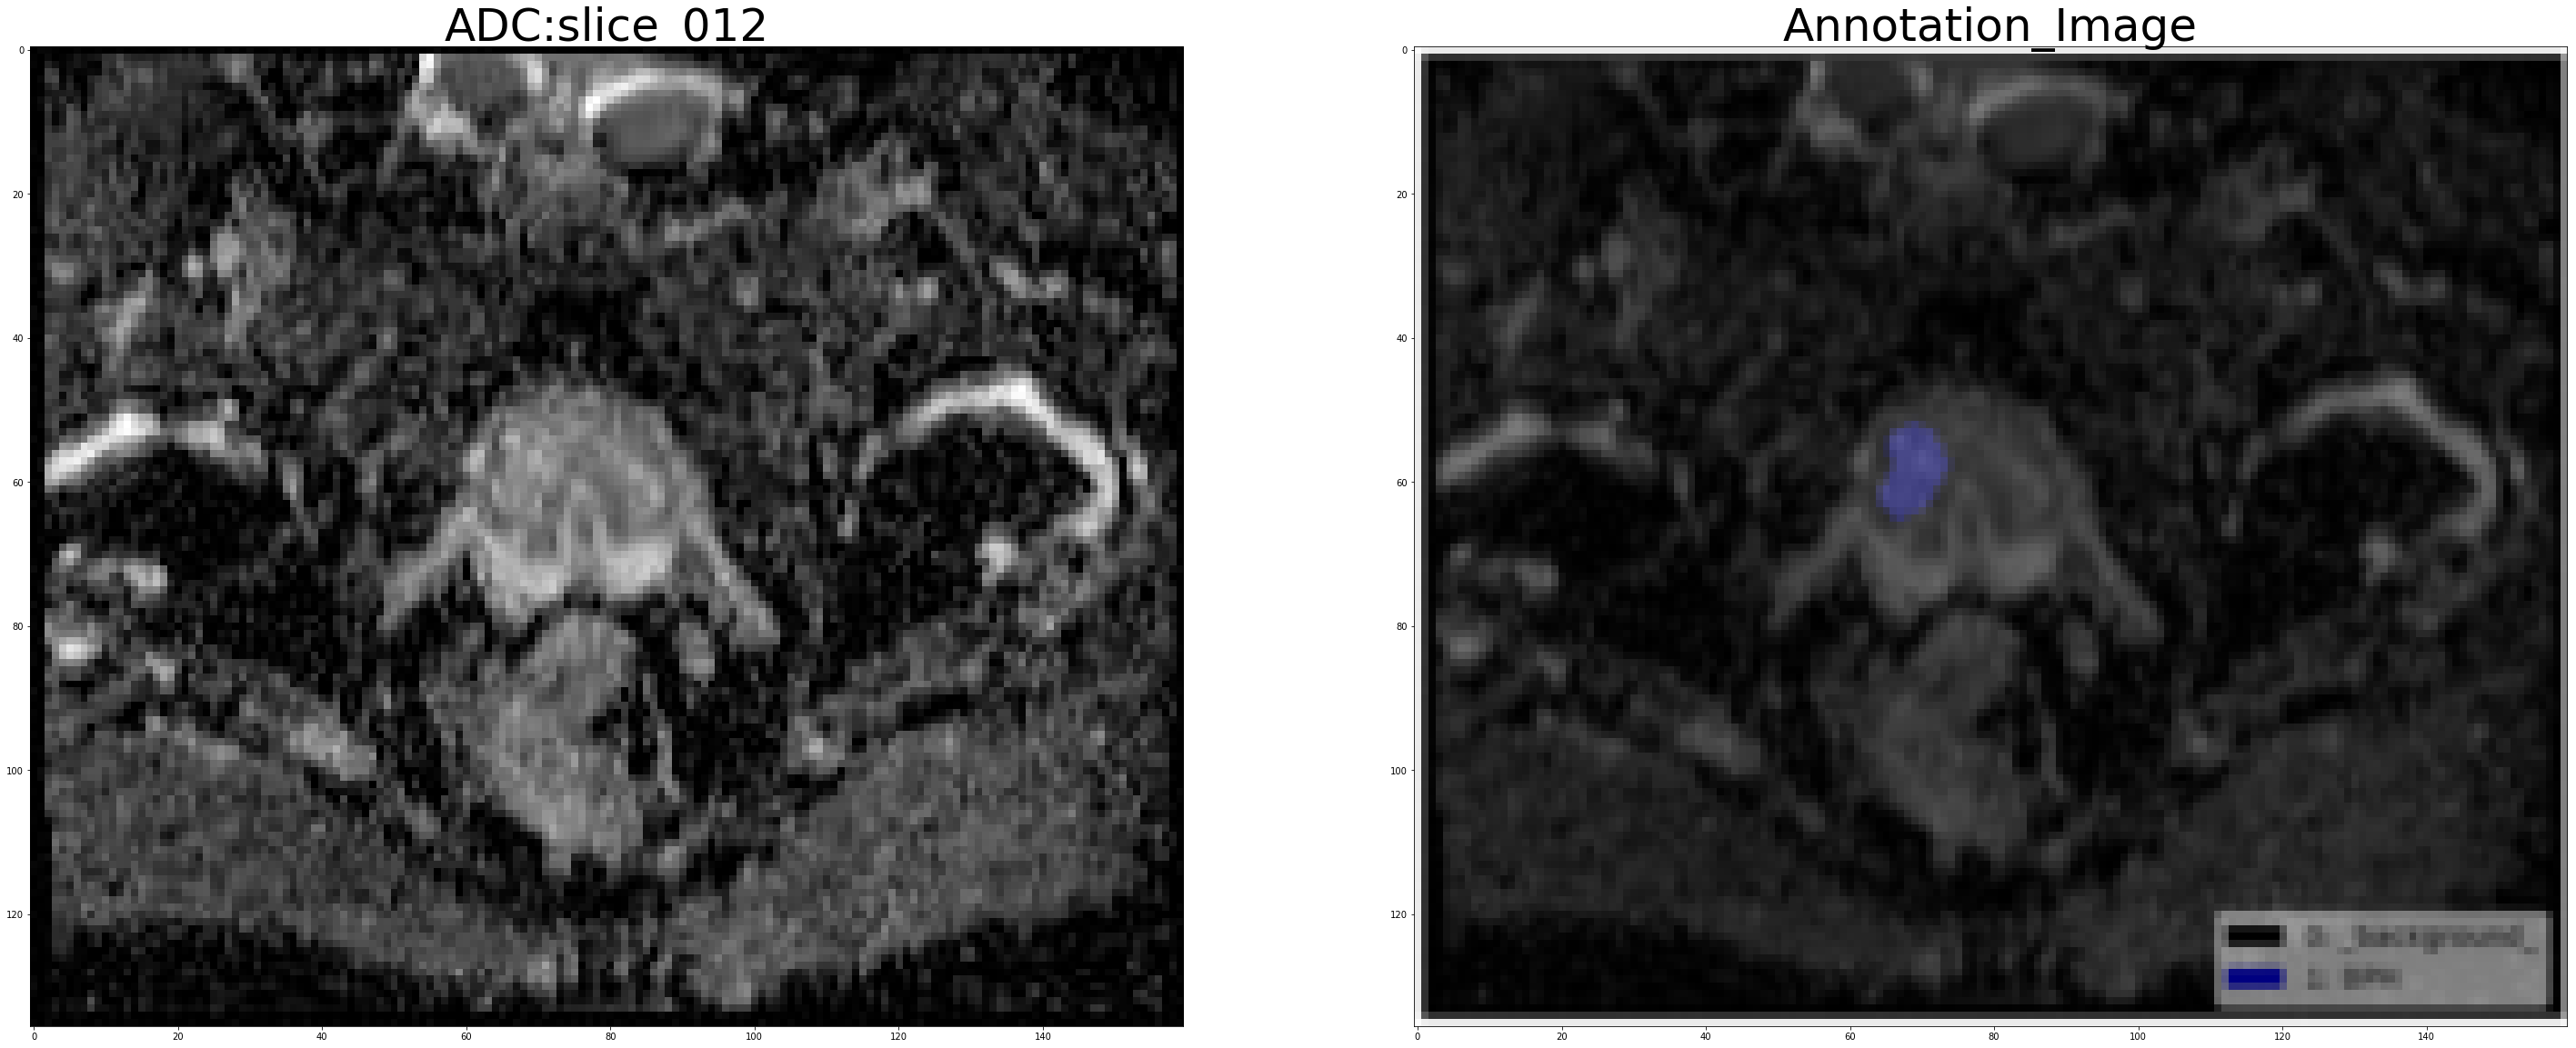

********************************************************************************************************************************************


In [56]:
series='ADC'

visualize_annotation(series,visualization_files)

# generate_PCA_Seg_data(series,seg_anno_files)

# generate_PCA_Classification_data(series,classification_anno_files)

1.Patient Name: CAIWENDA_100799384


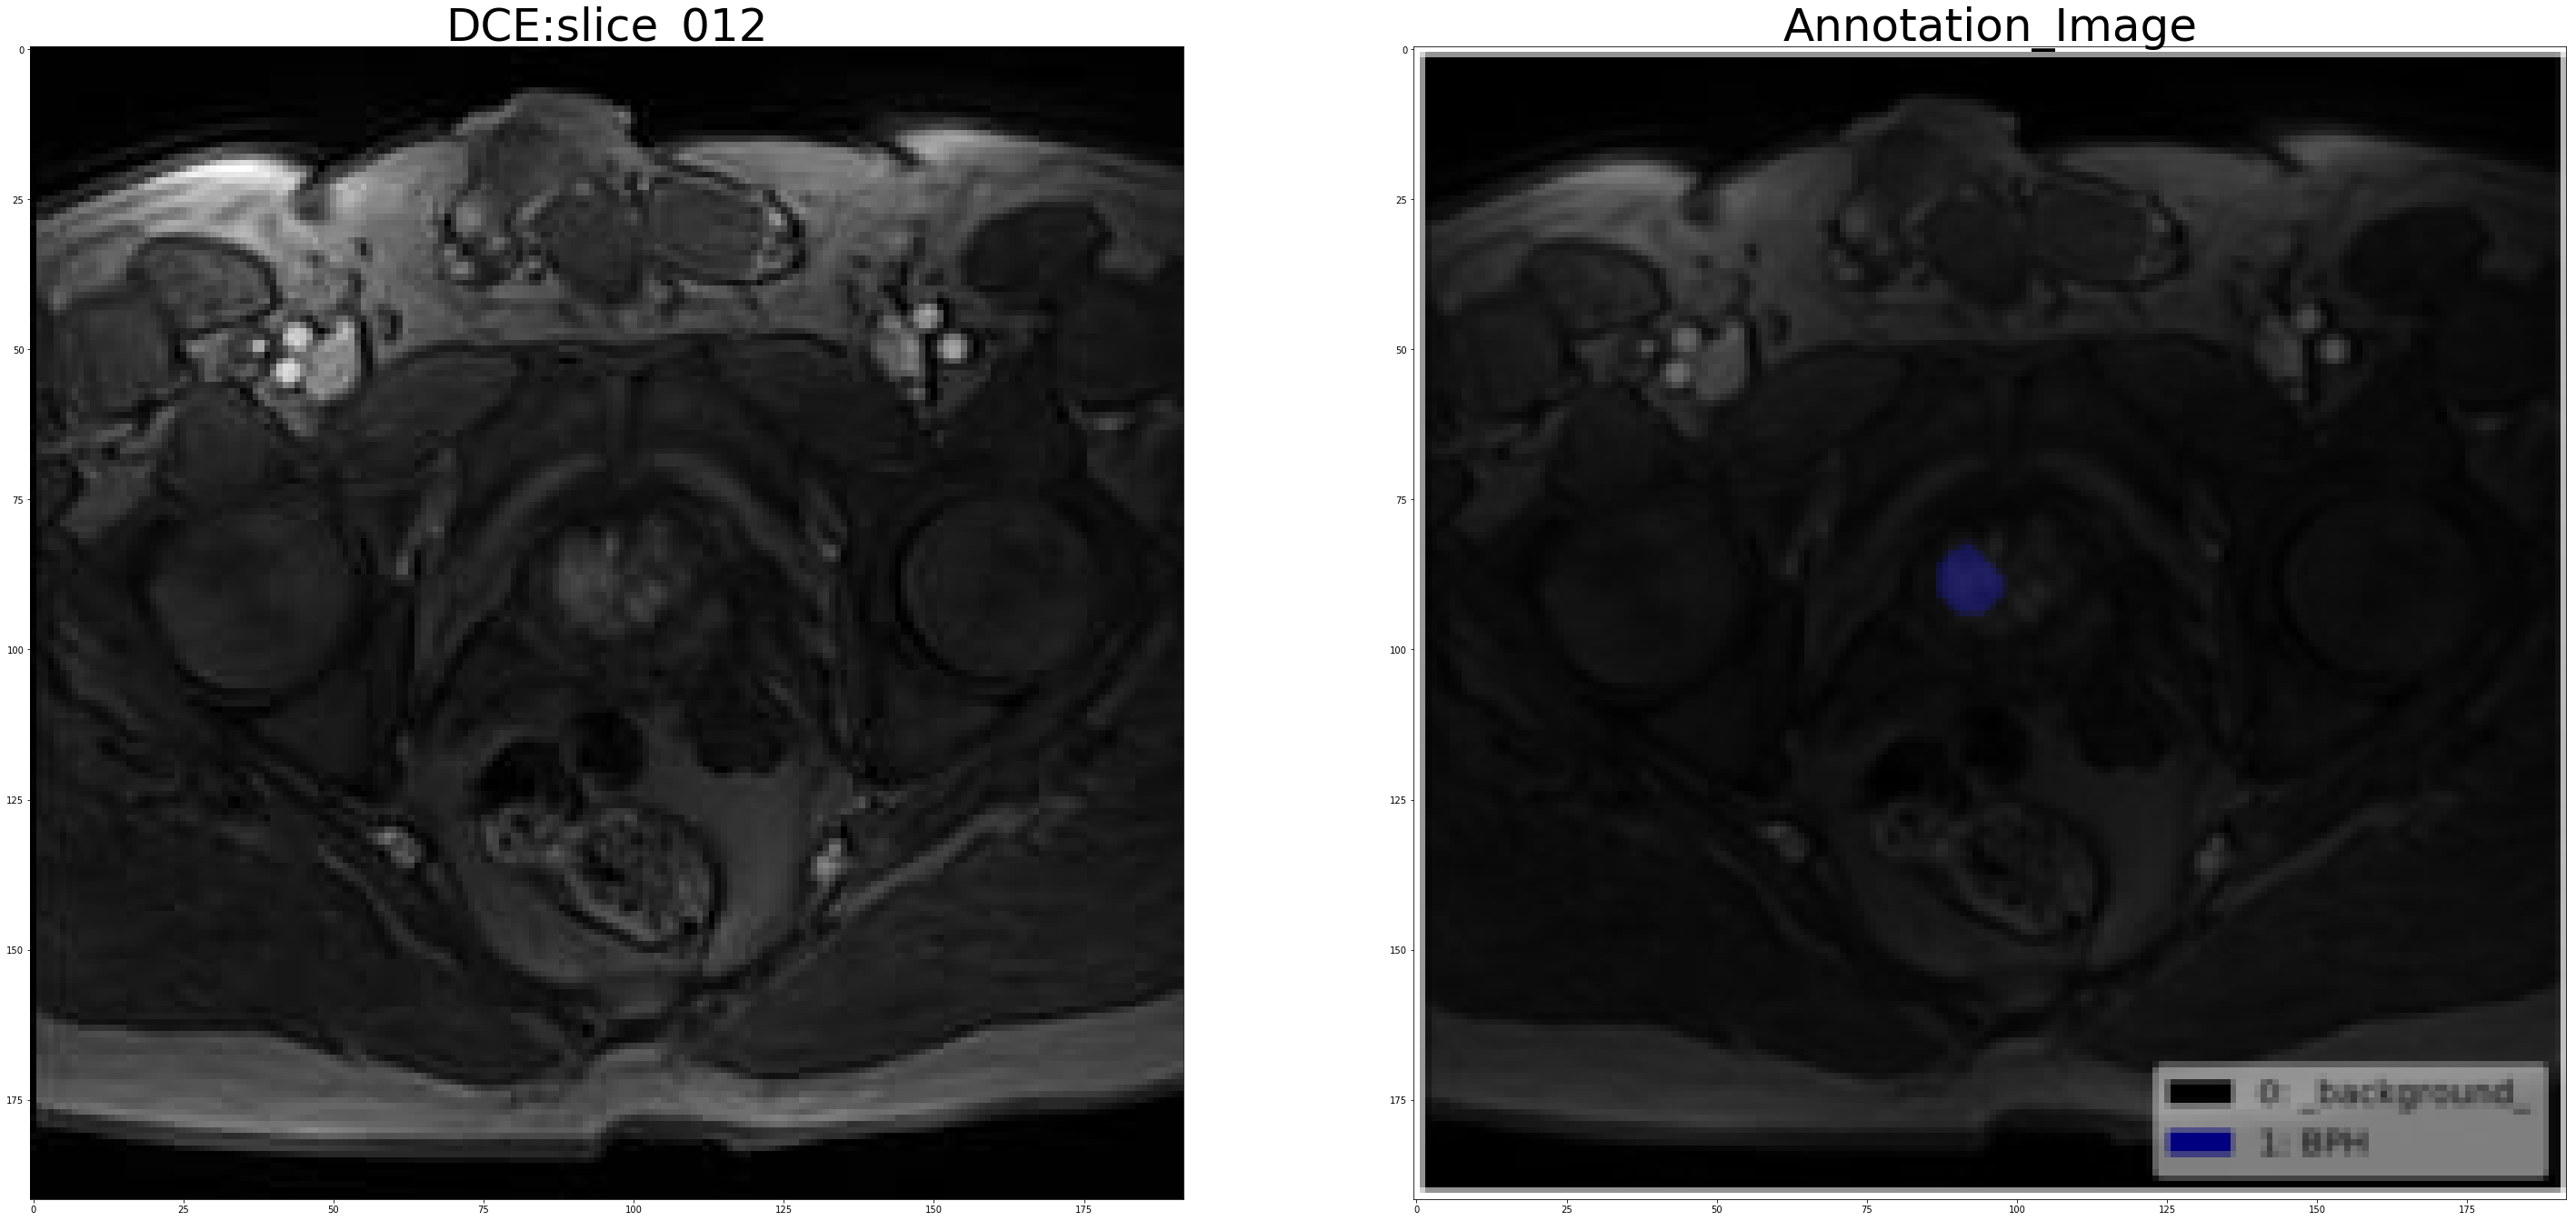

********************************************************************************************************************************************


In [57]:
series='DCE'

visualize_annotation(series,visualization_files)

# generate_PCA_Seg_data(series,seg_anno_files)

# generate_PCA_Classification_data(series,classification_anno_files)